In [1]:
%load_ext wurlitzer
import glob
import os
from xspec import *
from stingray import Lightcurve
from astropy.io import fits
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12,8]

Fit.statMethod = "chi"
Fit.nIterations = 100000
Fit.delta = 1e-4
Fit.criticalDelta = 1e-4


1 spectrum  in use
 
Spectral Data File: 0916811401_ALL3grpspec.fits  Spectrum 1
Net count rate (cts/s) for Spectrum:1  2.331e-02 +/- 1.884e-03 (77.2 % total)
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-11
  Telescope: XMM Instrument: EPIC  Channel Type: PI
  Exposure Time: 8581 sec
 Using fit statistic: chi
 Using Background File                0916811401_ALL3spec_bkg.fits
  Background Exposure Time: 8581 sec
 Using Response (RMF) File            0916811401_ALL3spec.rmf for Source 1



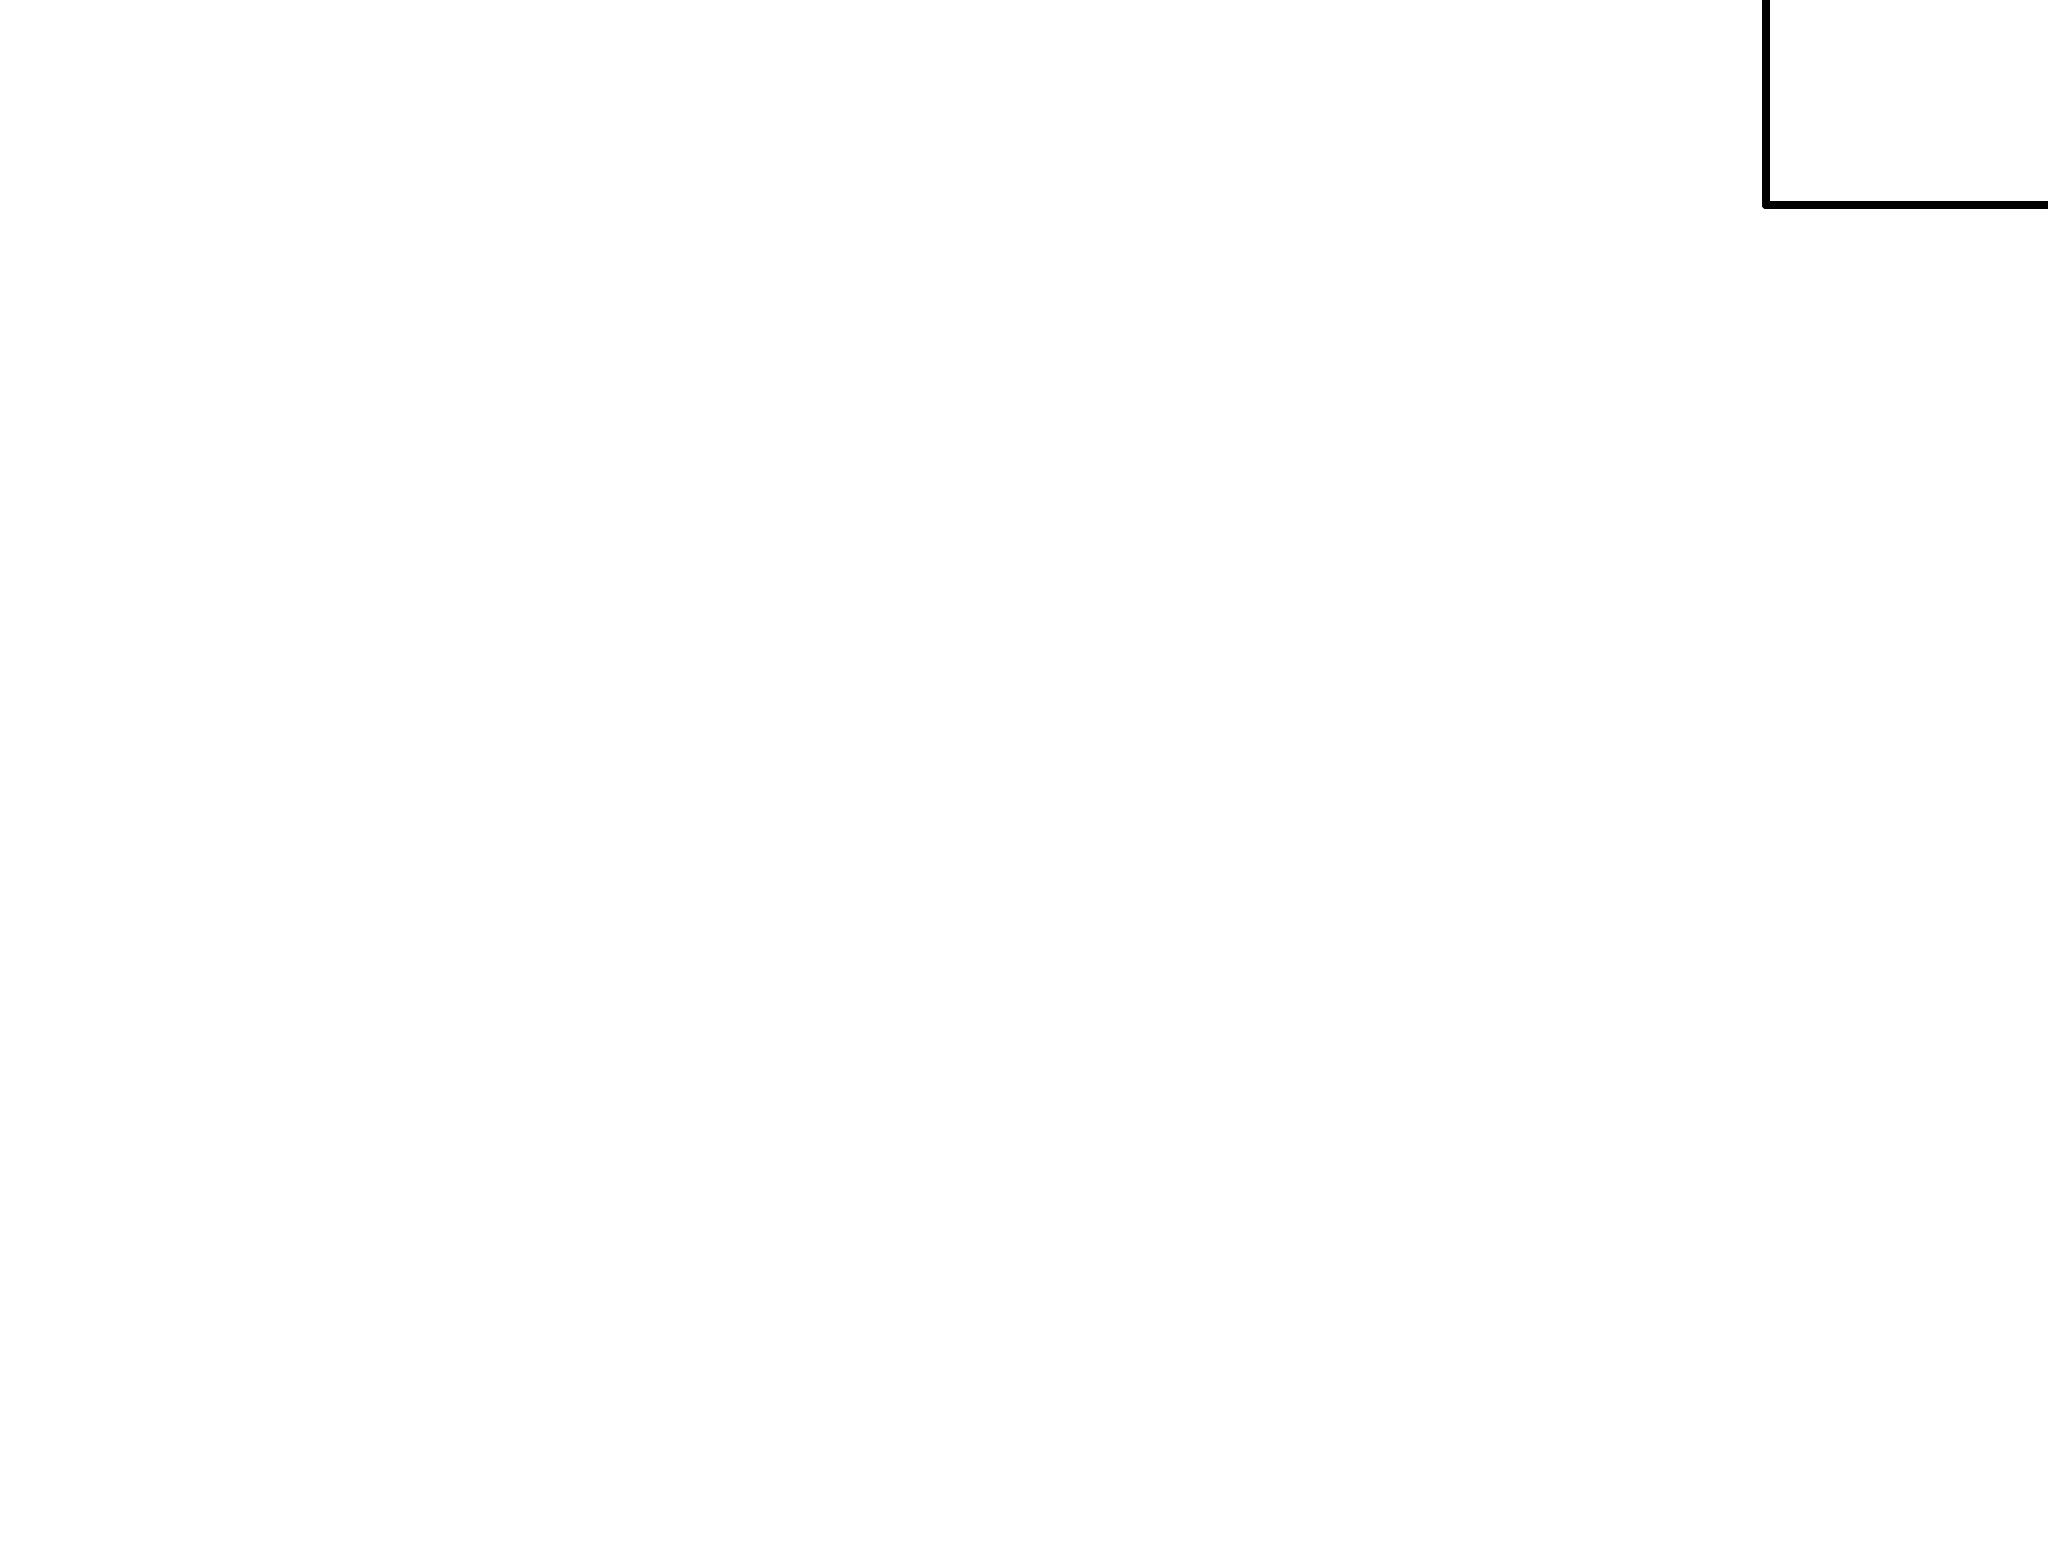

In [2]:
spec_fnames = glob.glob('*grp*')

spec = Spectrum(spec_fnames[0])
Plot.device="/svg"
Plot.xAxis="keV"
Plot.xLog=True
Plot.yLog=True
Plot.addCommand("Rescale Y 0.00001 0.01")
Plot("data")

     1 channels (1) ignored in spectrum #     1


Model TBabs<1>*bbody<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bbody      kT         keV      3.00000      +/-  0.0          
   3    2   bbody      norm                1.00000      +/-  0.0          
________________________________________________________________________

tbvabs Version 2.3
Cosmic absorption with grains and H2, modified from
Wilms, Allen, & McCray, 2000, ApJ 542, 914-924
Questions: Joern Wilms
joern.wilms@sternwarte.uni-erlangen.de
joern.wilms@fau.de

http://pulsar.sternwarte.uni-erlangen.de/wilms/research/tbabs/

PLEASE NOTICE:
To get the model described by the above paper
you will also have to set the abundances:
   abund wilm

Note that this routine ignores the current cross section setting
as it always HAS to use the Verner cross sections as a baseline.

Fit statistic  : Chi-Squared

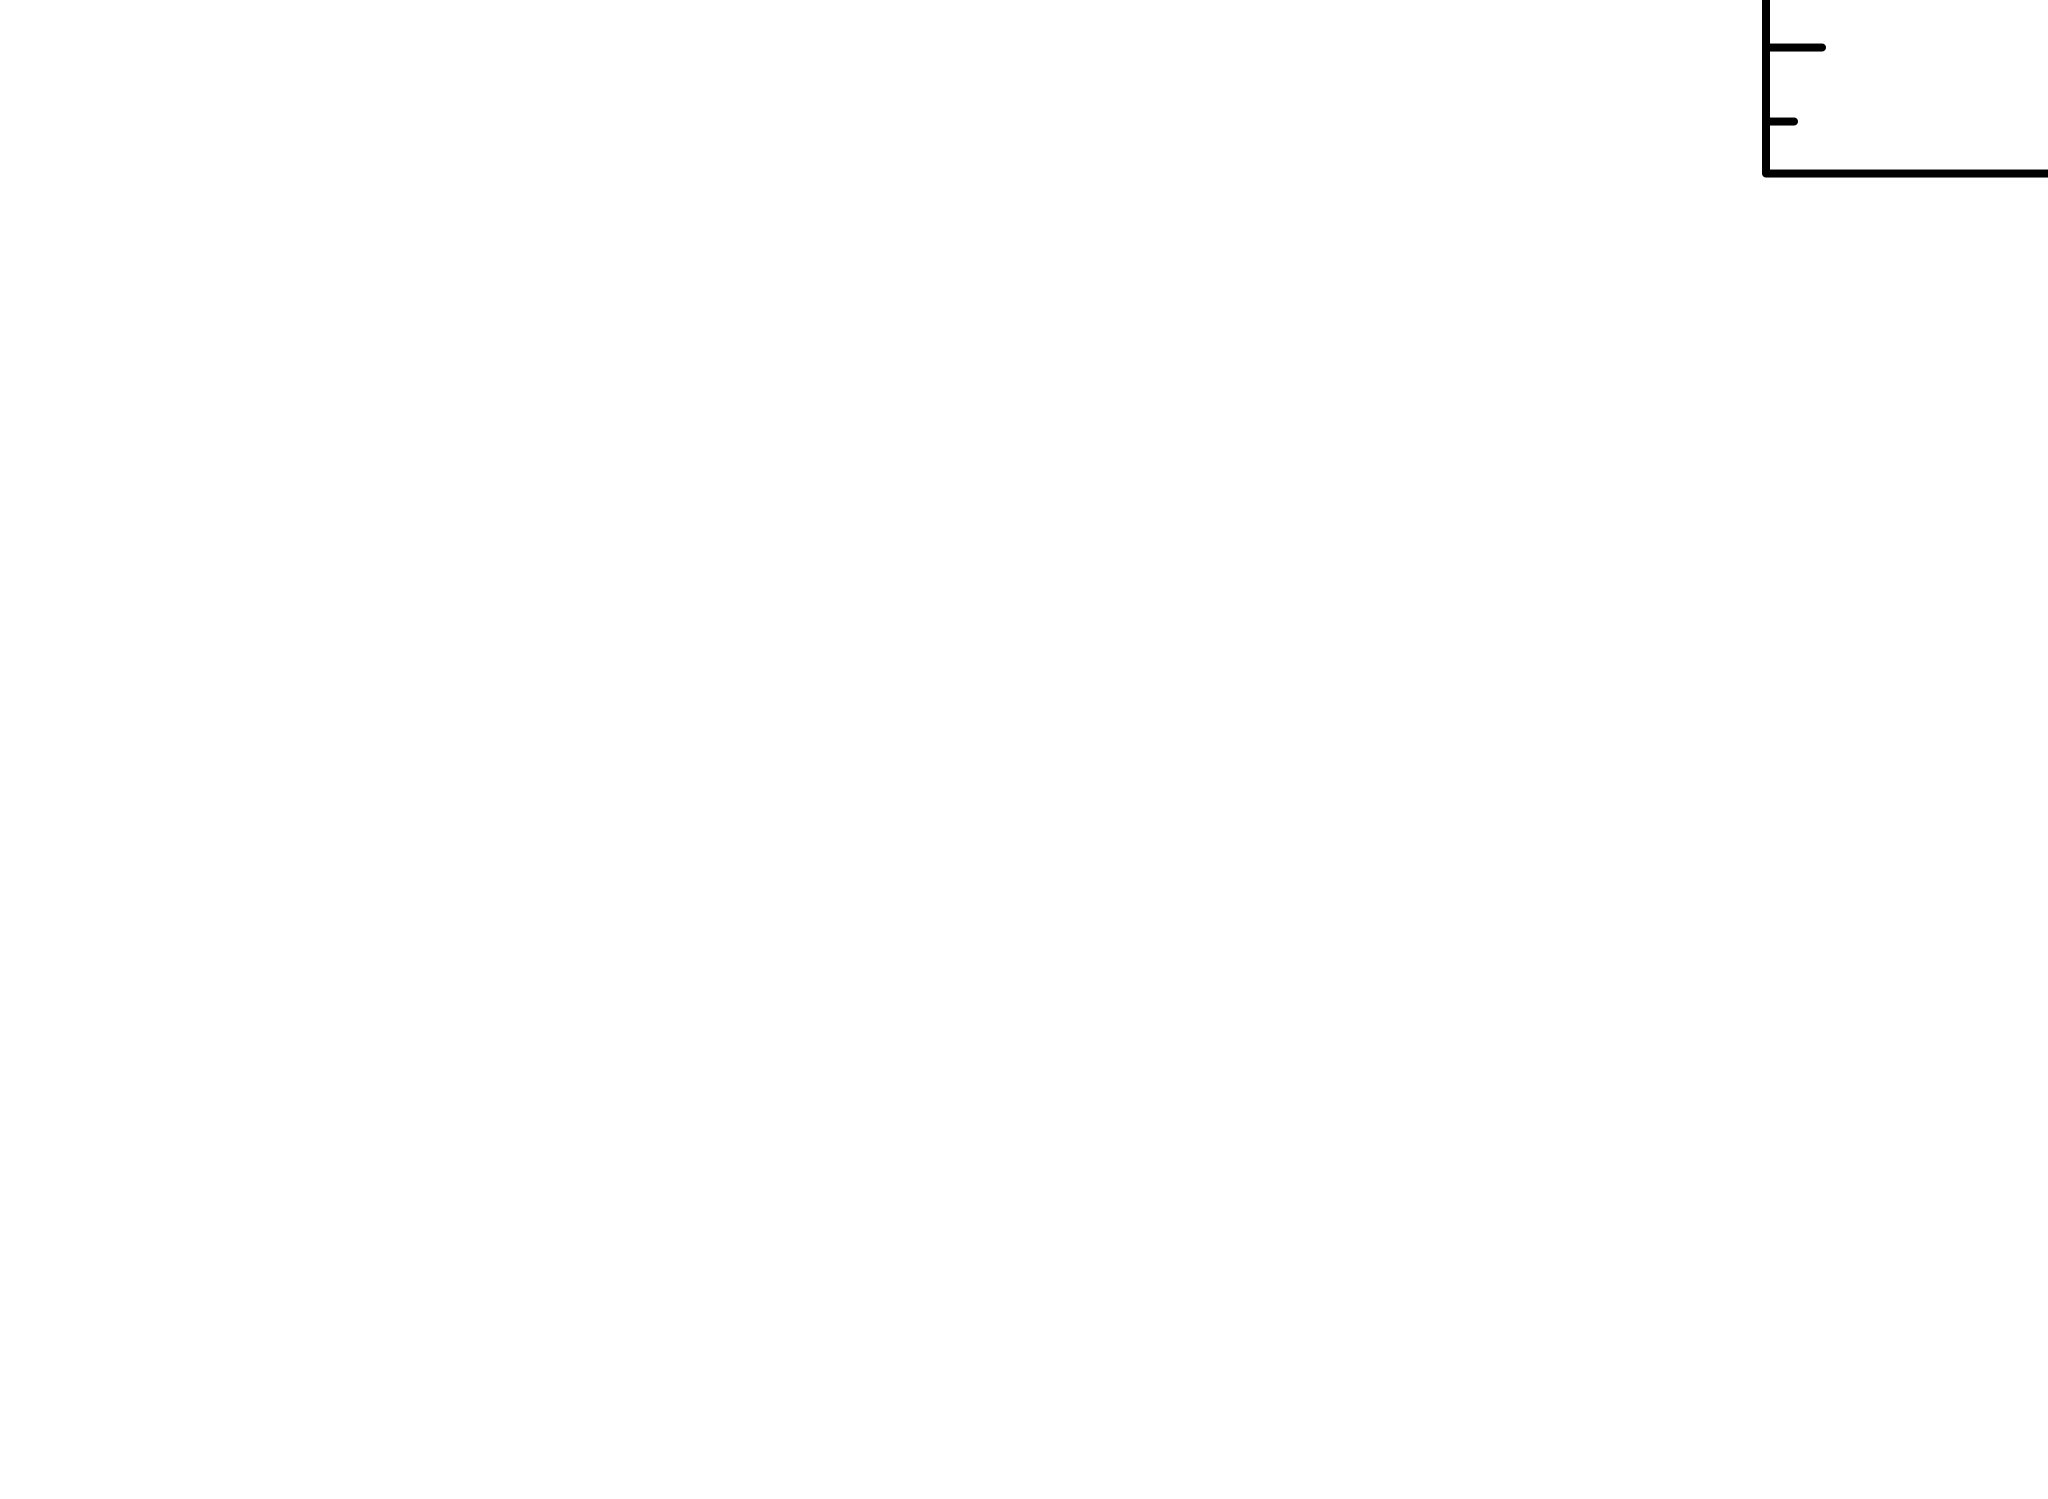

In [3]:
spec.ignore("**-0.2")
mo = Model("tbabs*bbody")
Fit.perform()
Plot("data resid")


Model TBabs<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   powerlaw   PhoIndex            1.00000      +/-  0.0          
   3    2   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              9.617032e+10     using 10 bins.

Test statistic : Chi-Squared              9.617032e+10     using 10 bins.
 Null hypothesis probability of 0.000000e+00 with 7 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH    2:PhoIndex        3:norm
11.5148      7.34122      -3       3.56676      0.388112   2.22301e-05
11.1312      66139.1      -2       4.31976      0.523036   2.86012e-05
10.7439      71997.1      -2       4.77144      0.612963   3.45299e-05

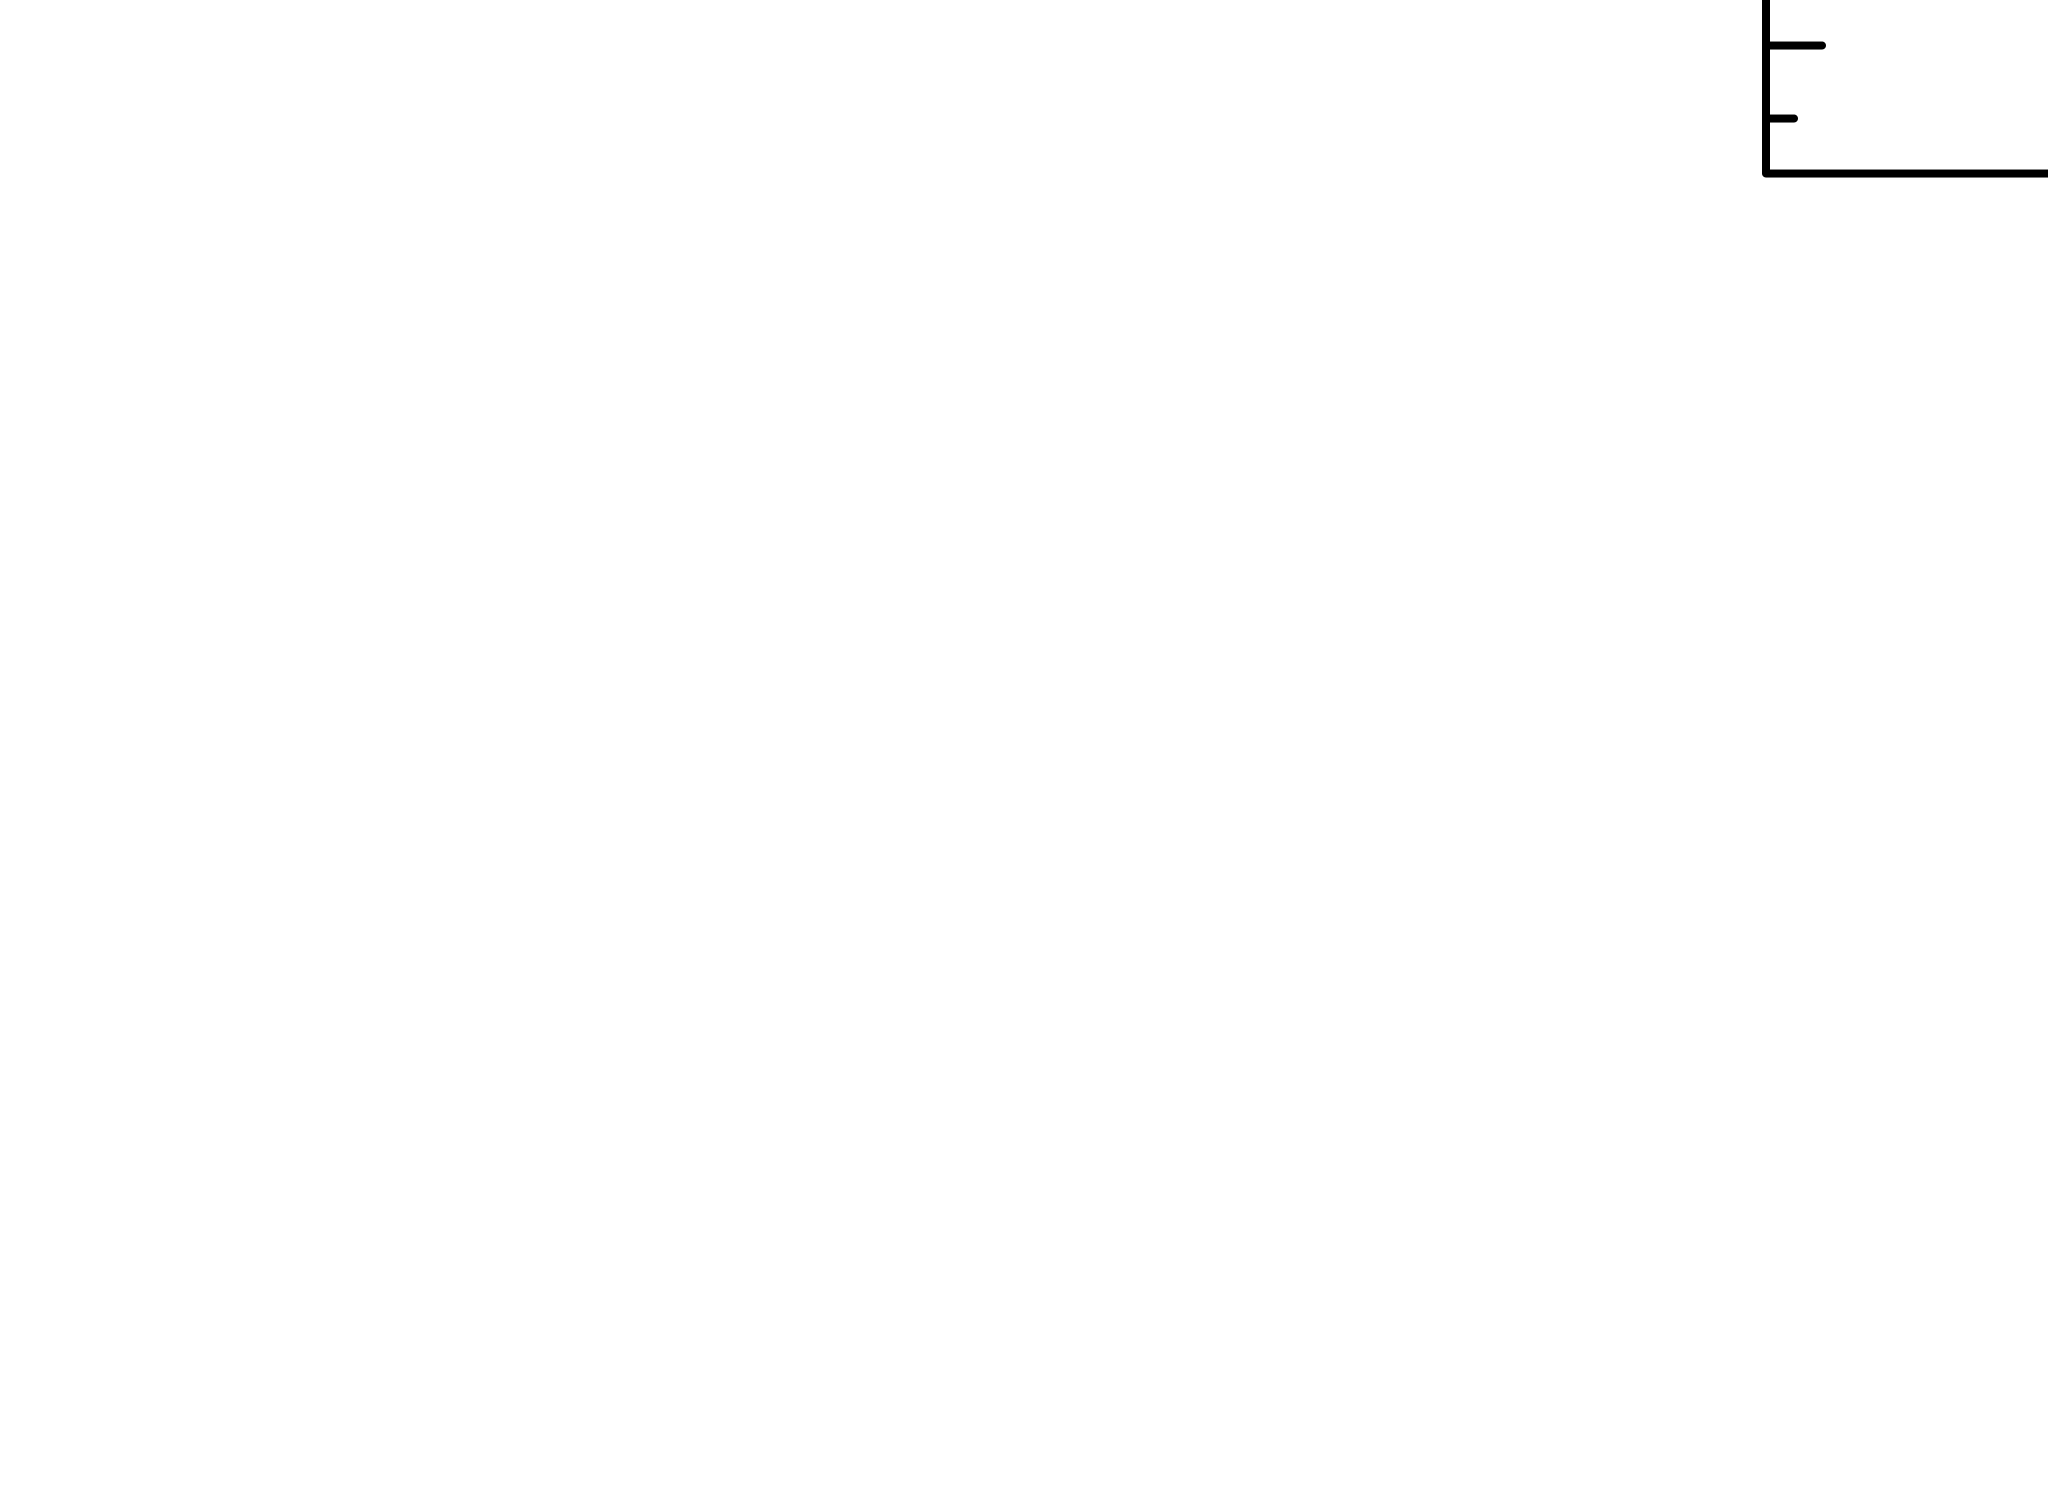

In [4]:
AllModels.clear()
mo = Model("tbabs*powerlaw")
Fit.perform()
Plot("data resid")


Model TBabs<1>*bremss<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bremss     kT         keV      7.00000      +/-  0.0          
   3    2   bremss     norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              1.298625e+10     using 10 bins.

Test statistic : Chi-Squared              1.298625e+10     using 10 bins.
 Null hypothesis probability of 0.000000e+00 with 7 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        3:norm
68.8368      2.14002      -1       3.83680       26.5437   7.52819e-05
23.5243      171180       -2       4.97278       198.525   0.000207813
12.0666      44982.2      -2       7.71154       195.441   0.000305503
1

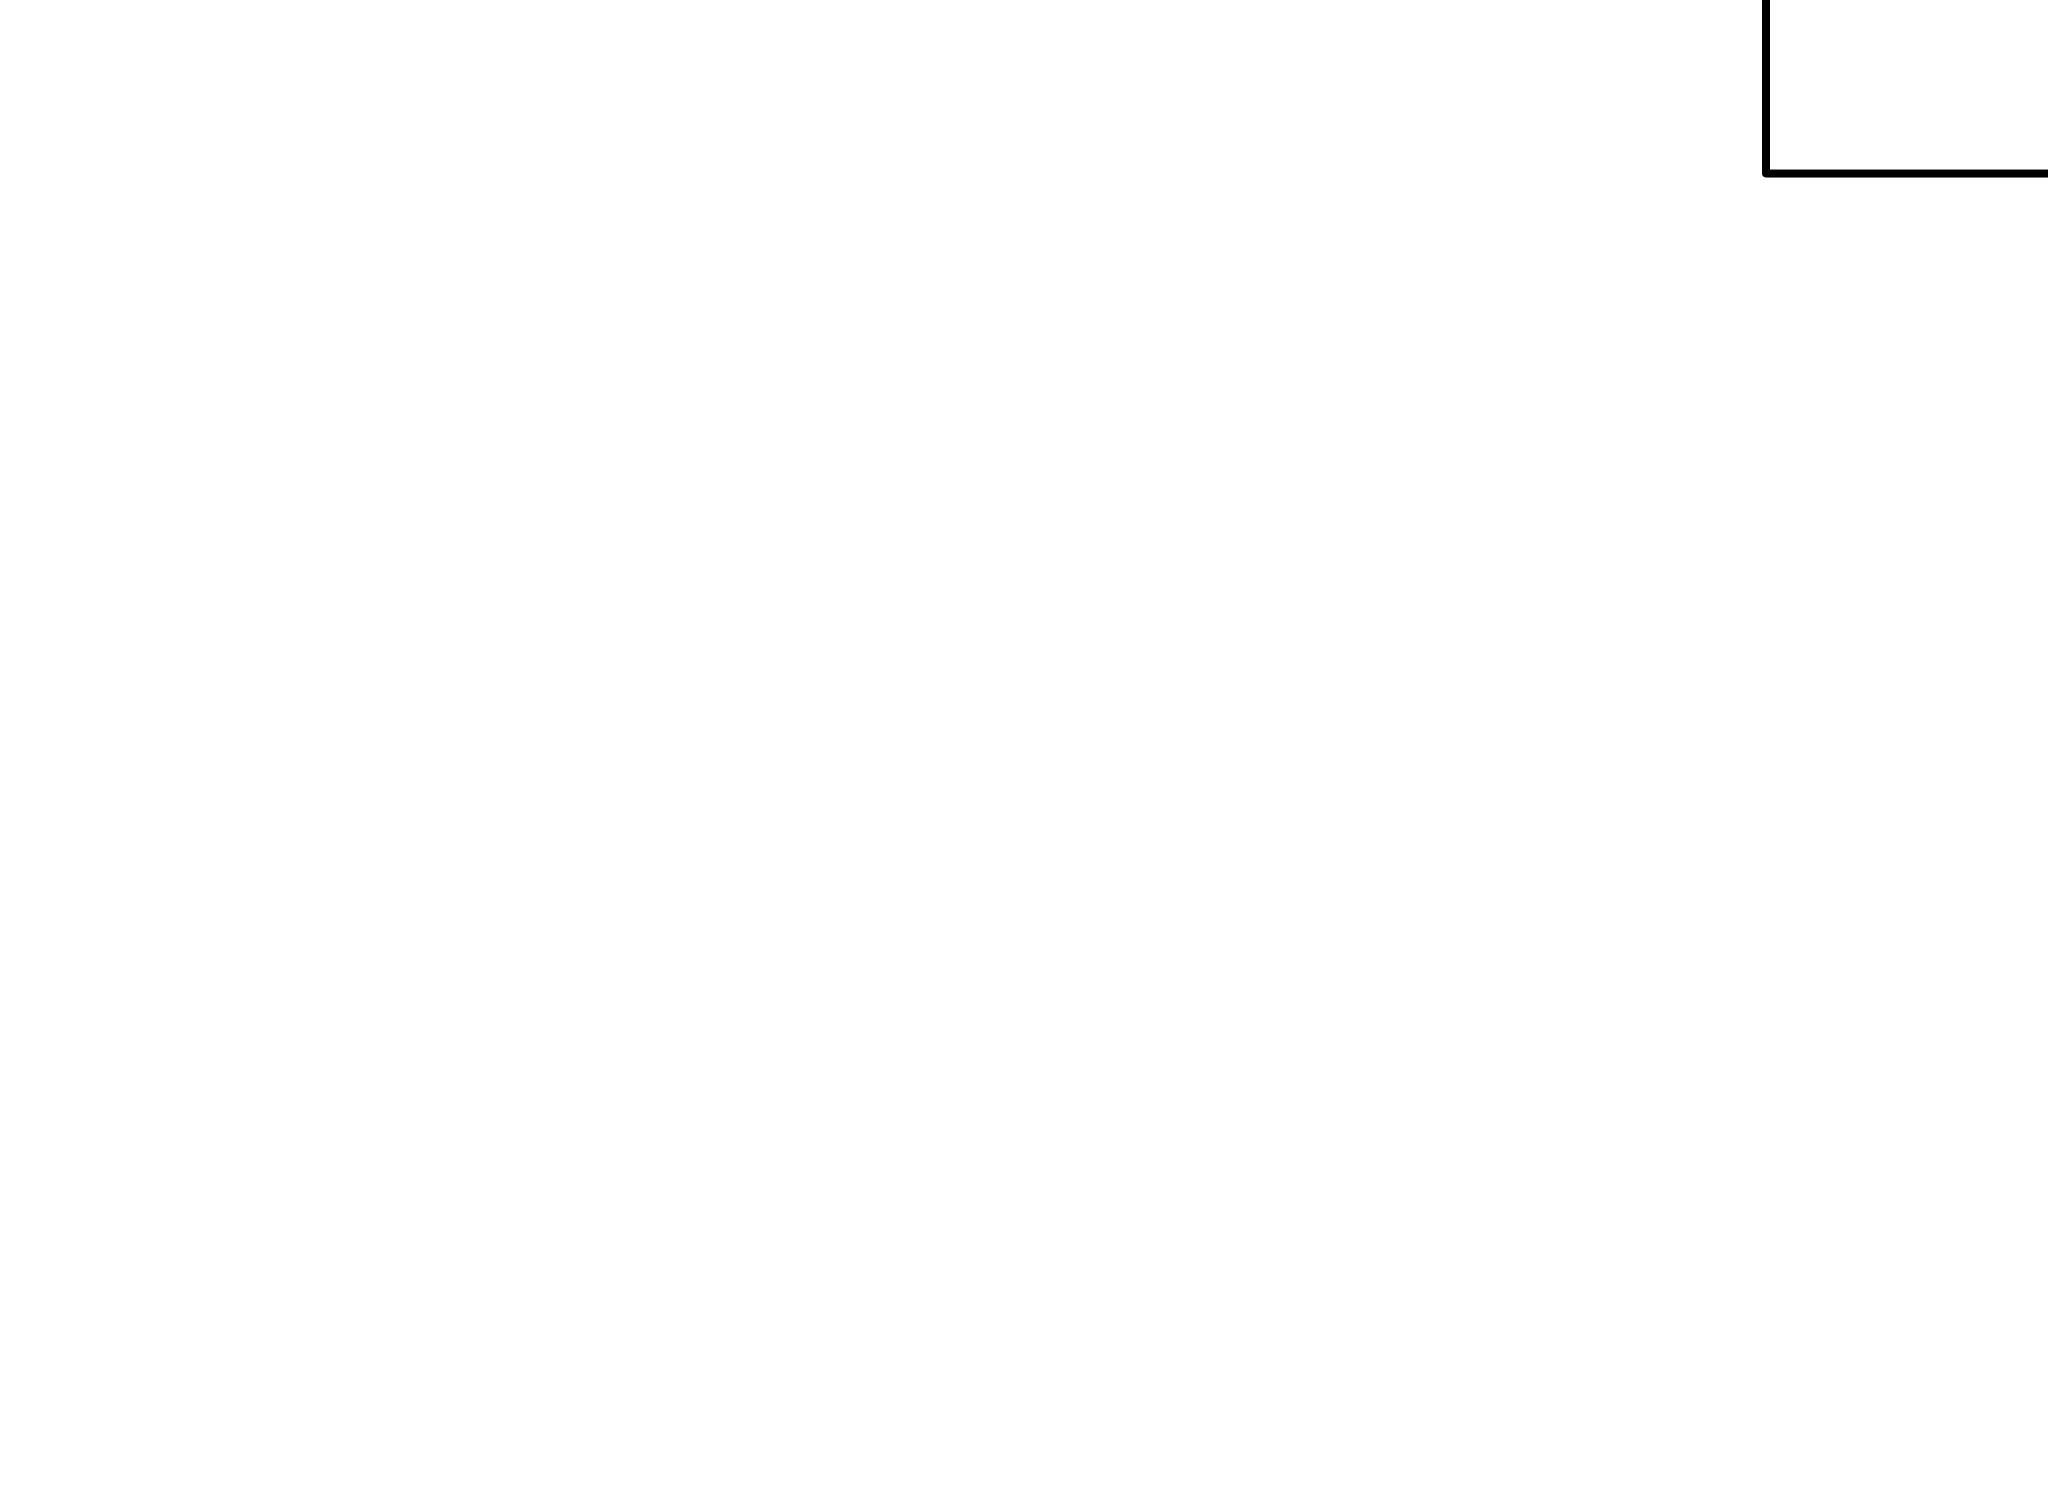

In [5]:
AllModels.clear()
mo = Model("tbabs*bremss")
Fit.perform()
Plot("data resid")


Model TBabs<1>*apec<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   apec       kT         keV      1.00000      +/-  0.0          
   3    2   apec       Abundanc            1.00000      frozen
   4    2   apec       Redshift            0.0          frozen
   5    2   apec       norm                1.00000      +/-  0.0          
________________________________________________________________________

Reading APEC data from 3.0.9


Fit statistic  : Chi-Squared              2.577527e+08     using 10 bins.

Test statistic : Chi-Squared              2.577527e+08     using 10 bins.
 Null hypothesis probability of 0.000000e+00 with 7 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        5:norm
94.5471      4.47525      -3      0.153713       7.23857   0

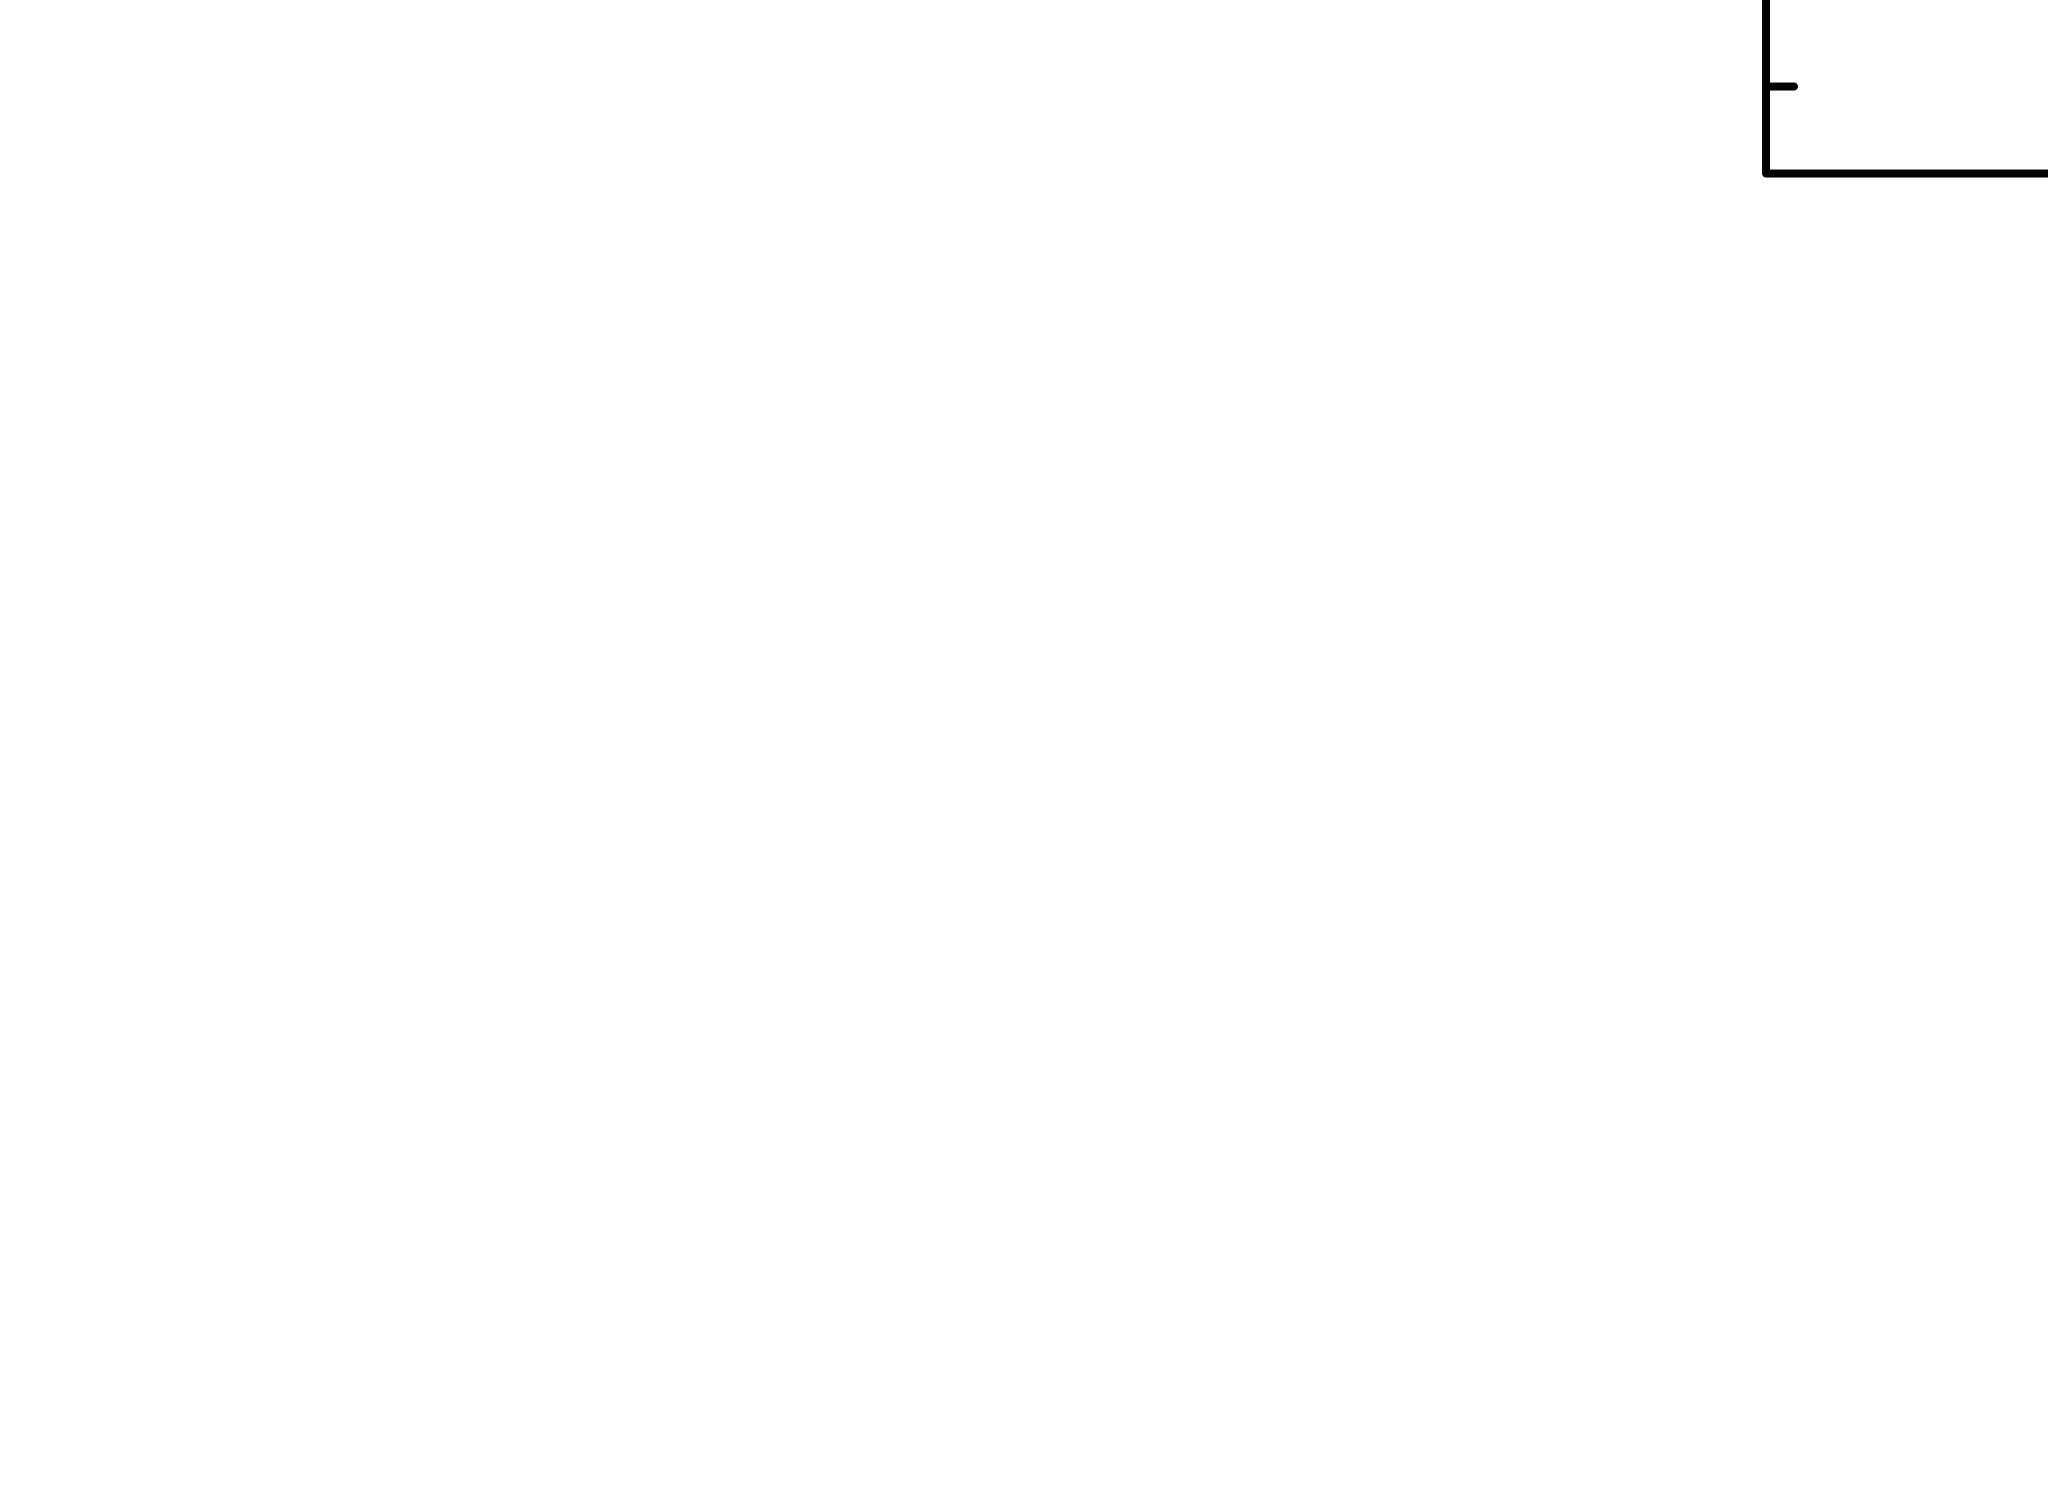

In [6]:
AllModels.clear()
mo = Model("tbabs*apec")
Fit.perform()
Plot("data resid")

In [7]:
AllModels.calcFlux(".2 12.0")

 Model Flux 7.2476e-05 photons (6.9453e-13 ergs/cm^2/s) range (0.20000 - 12.000 keV)


In [8]:
#plx = 1.4843
d_kpc = 8
F_x = 4.7217*10**-13

L_x = 4*3.14*F_x*(d_kpc*3.086*10**21)**2
print(L_x)

3.614596693110989e+33


In [9]:
import numpy as np
print(d_kpc)
print(np.log10(L_x))

8
33.55805984693411


In [10]:
F_opt = 1.05*10**-5 * 10**(-0.4*20.7)
print('Optical Flux: ',F_opt)
print('F_x / F_opt: ', np.log10(F_x/F_opt))

Optical Flux:  5.510478332622621e-14
F_x / F_opt:  0.9329090910248423



Model TBabs<1>(powerlaw<2> + gaussian<3>) Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   powerlaw   PhoIndex            1.00000      +/-  0.0          
   3    2   powerlaw   norm                1.00000      +/-  0.0          
   4    3   gaussian   LineE      keV      6.50000      +/-  0.0          
   5    3   gaussian   Sigma      keV      0.100000     +/-  0.0          
   6    3   gaussian   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              2.758694e+11     using 10 bins.

Test statistic : Chi-Squared              2.758694e+11     using 10 bins.
 Null hypothesis probability of 0.000000e+00 with 4 degrees of freedom
 Current data and model not fit yet.


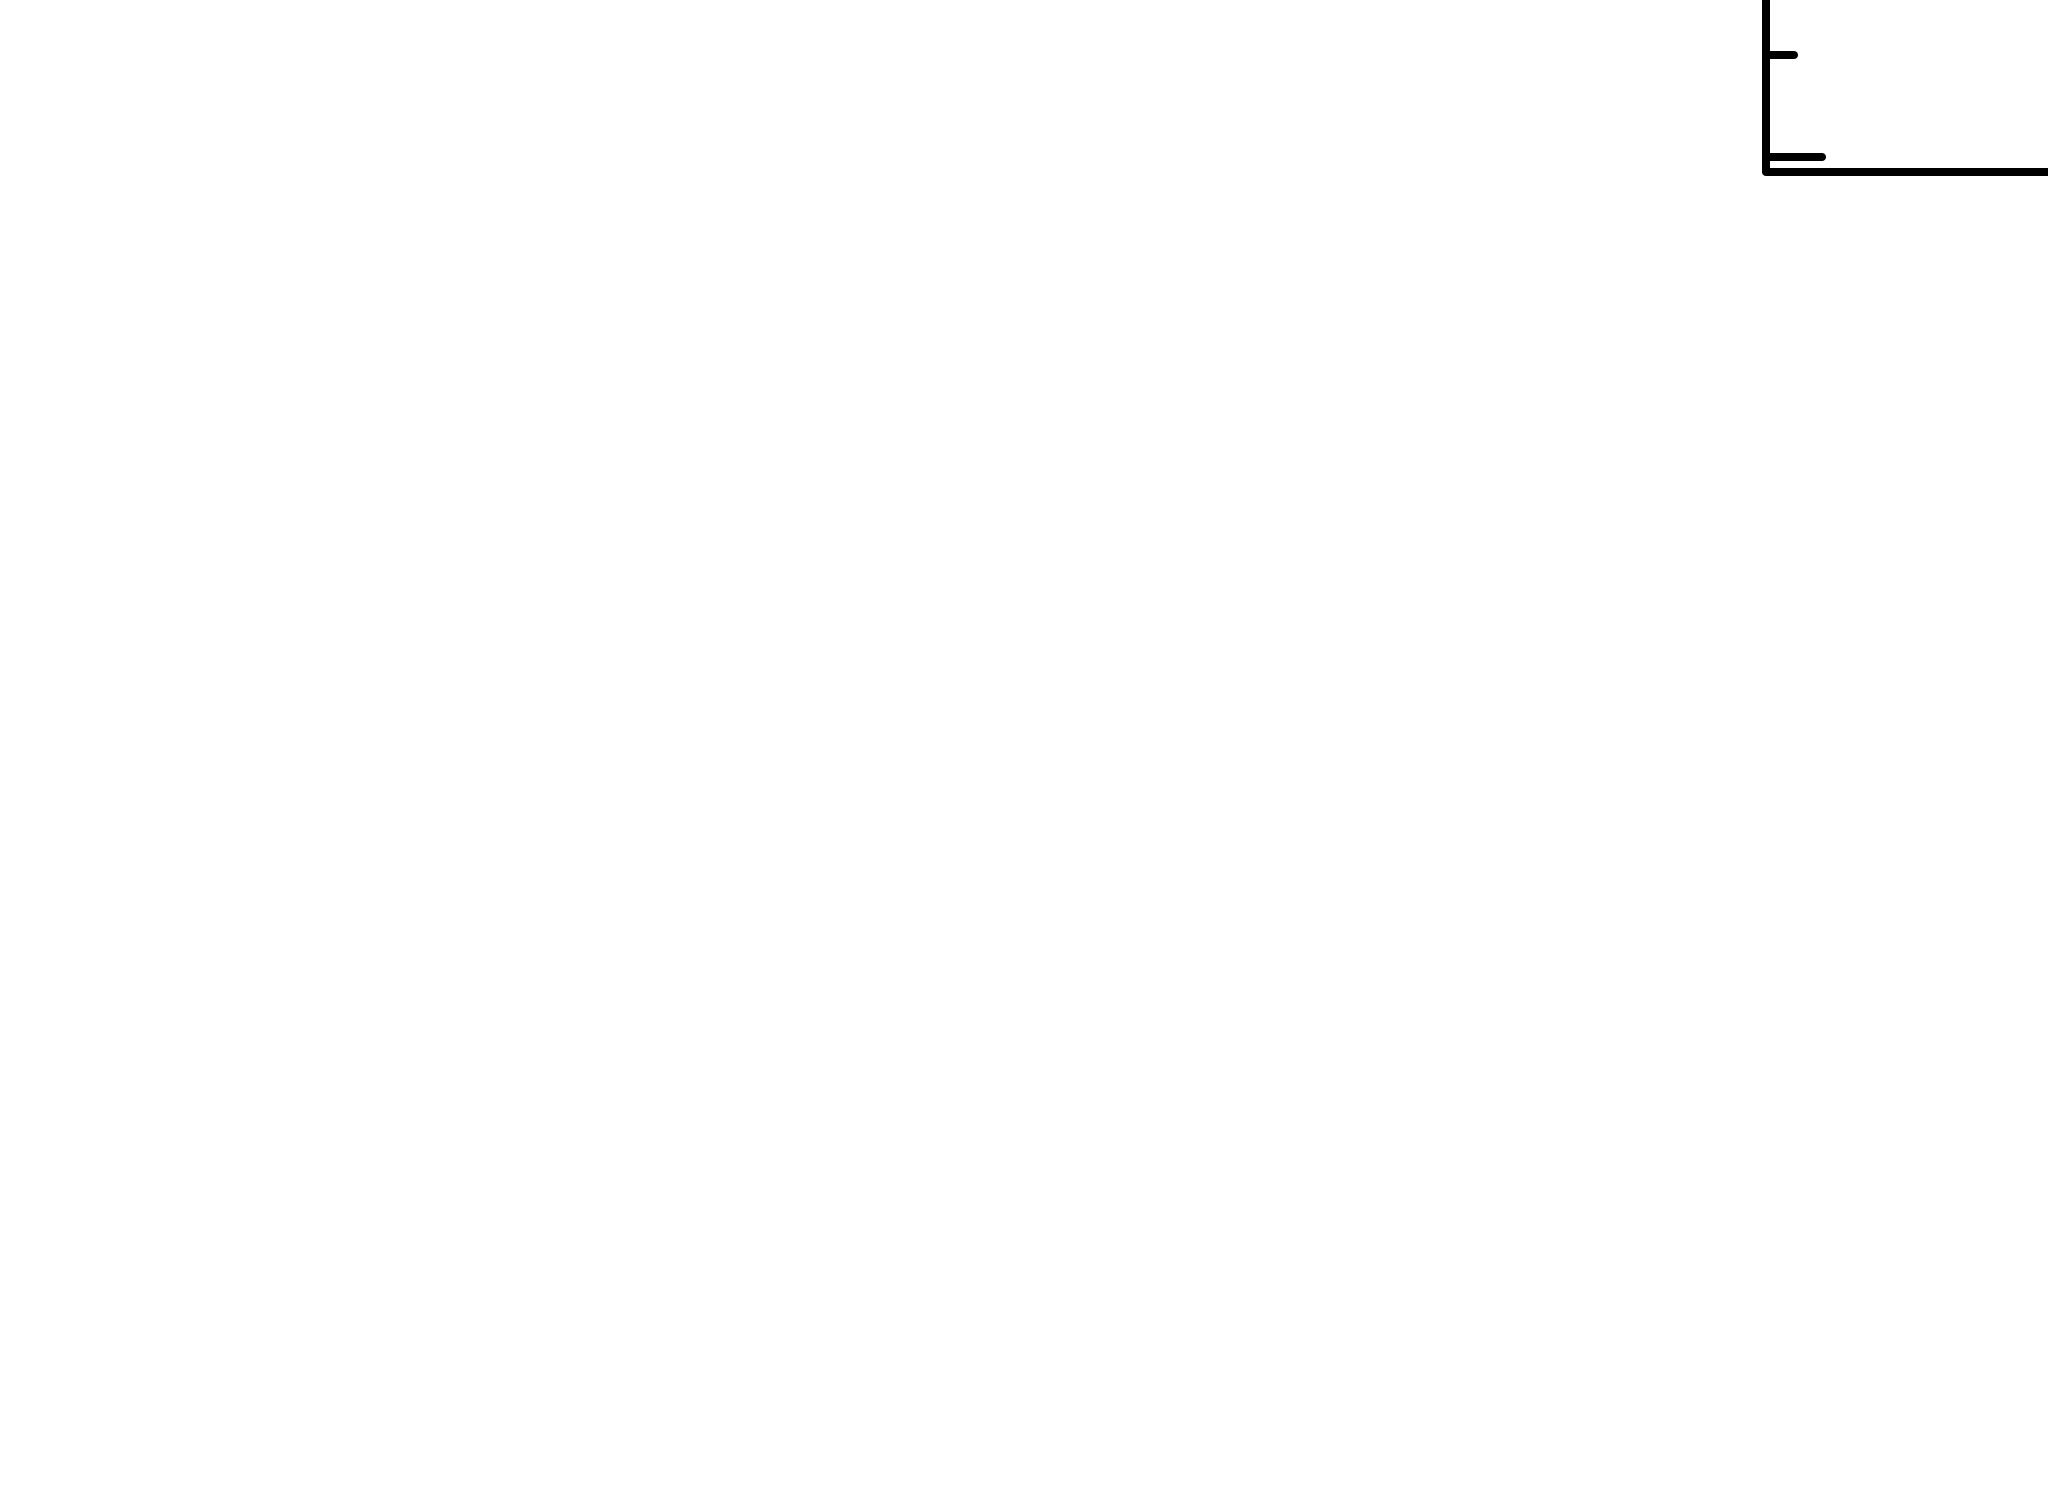


Fit statistic  : Chi-Squared              2.819082e+11     using 10 bins.

Test statistic : Chi-Squared              2.819082e+11     using 10 bins.
 Null hypothesis probability of 0.000000e+00 with 4 degrees of freedom
 Current data and model not fit yet.

Fit statistic  : Chi-Squared              2.819082e+11     using 10 bins.

Test statistic : Chi-Squared              2.819082e+11     using 10 bins.
 Null hypothesis probability of 0.000000e+00 with 5 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH    2:PhoIndex        3:norm       5:Sigma        6:norm
36.8745      297712       -3       6.51159      0.475302   3.90636e-05      0.458872   9.69819e-06
7.22985      441762       -4       5.32985      0.901522   5.19676e-05      0.595081   1.11395e-05
6.71344      25952.2      -2       5.22523       1.02902   6.01705e-05      0.651507   1.14959e-05
6.5833       5916.68      -2       5.50839

In [14]:
AllModels.clear()
mo = Model("tbabs*(powerlaw+gauss)")
mo.gaussian.LineE = 6.7
mo.gaussian.LineE.frozen = True
Fit.perform()
Plot("data resid")

In [ ]:
Fit.error("2")


Model TBabs<1>(bbody<2> + gaussian<3>) Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bbody      kT         keV      3.00000      +/-  0.0          
   3    2   bbody      norm                1.00000      +/-  0.0          
   4    3   gaussian   LineE      keV      6.50000      +/-  0.0          
   5    3   gaussian   Sigma      keV      0.100000     +/-  0.0          
   6    3   gaussian   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              7.403314e+11     using 10 bins.

Test statistic : Chi-Squared              7.403314e+11     using 10 bins.
 Null hypothesis probability of 0.000000e+00 with 4 degrees of freedom
 Current data and model not fit yet.

Fit statistic  : Chi-Squared              7.401764e+11     using 10 bins.

Test statistic :

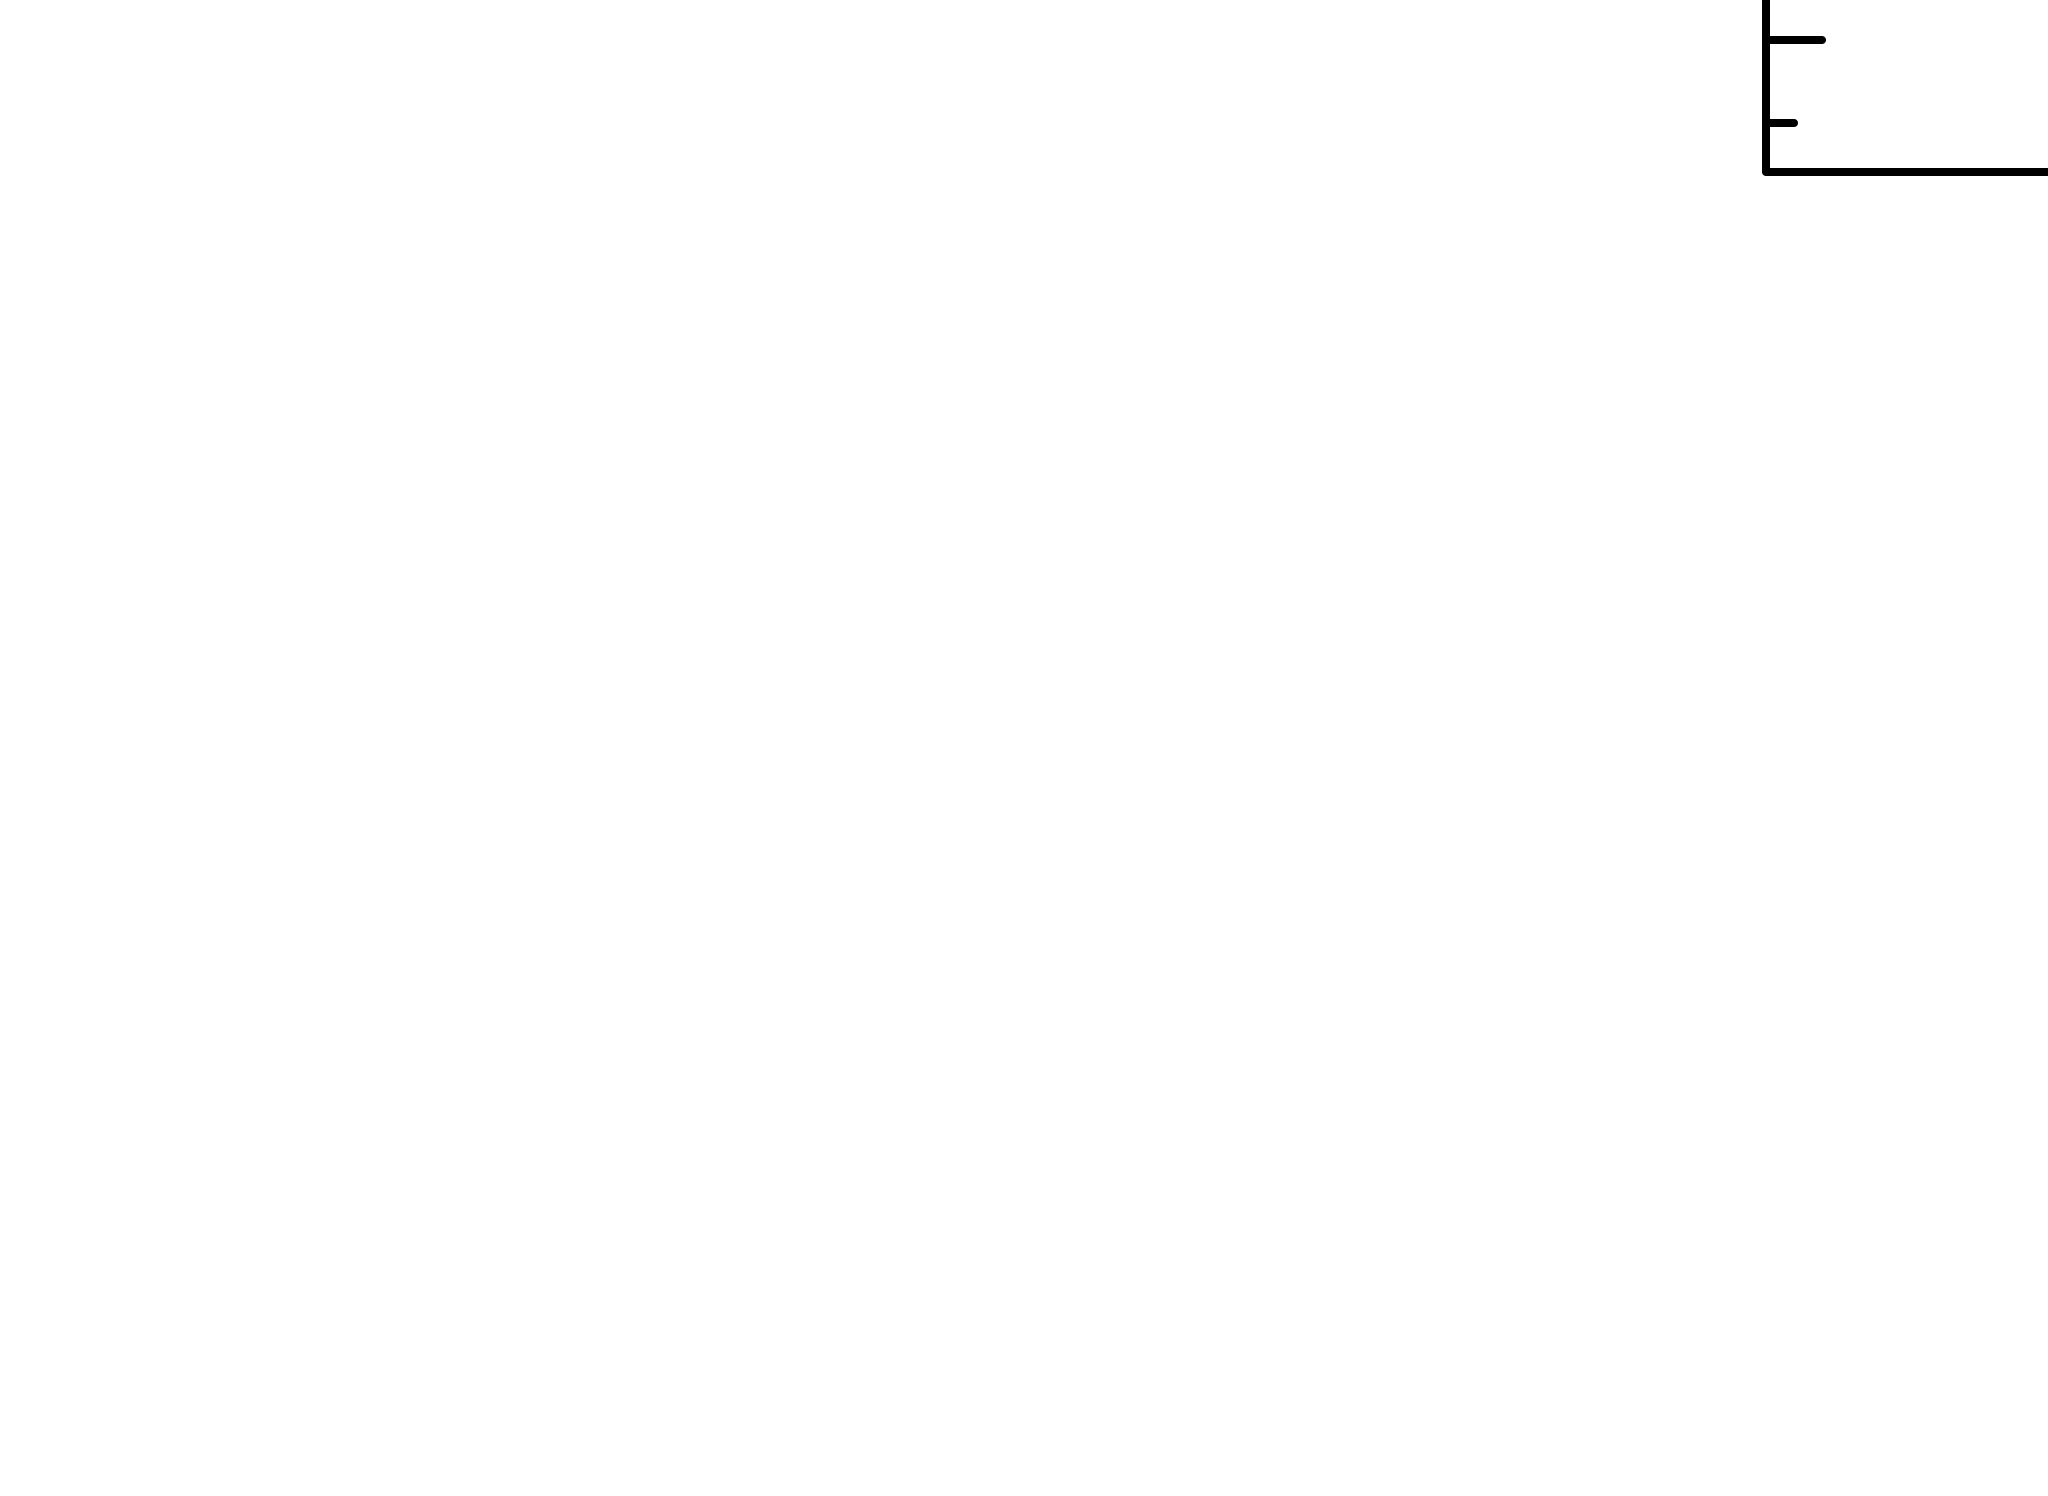

In [13]:
AllModels.clear()
mo = Model("tbabs*(bbody+gauss)")
mo.gaussian.LineE = 6.7
mo.gaussian.LineE.frozen = True
Fit.perform()
Plot("data resid")


Model TBabs<1>(bbody<2> + powerlaw<3>) Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bbody      kT         keV      3.00000      +/-  0.0          
   3    2   bbody      norm                1.00000      +/-  0.0          
   4    3   powerlaw   PhoIndex            1.00000      +/-  0.0          
   5    3   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              9.436651e+11     using 10 bins.

Test statistic : Chi-Squared              9.436651e+11     using 10 bins.
 Null hypothesis probability of 0.000000e+00 with 5 degrees of freedom
 Current data and model not fit yet.


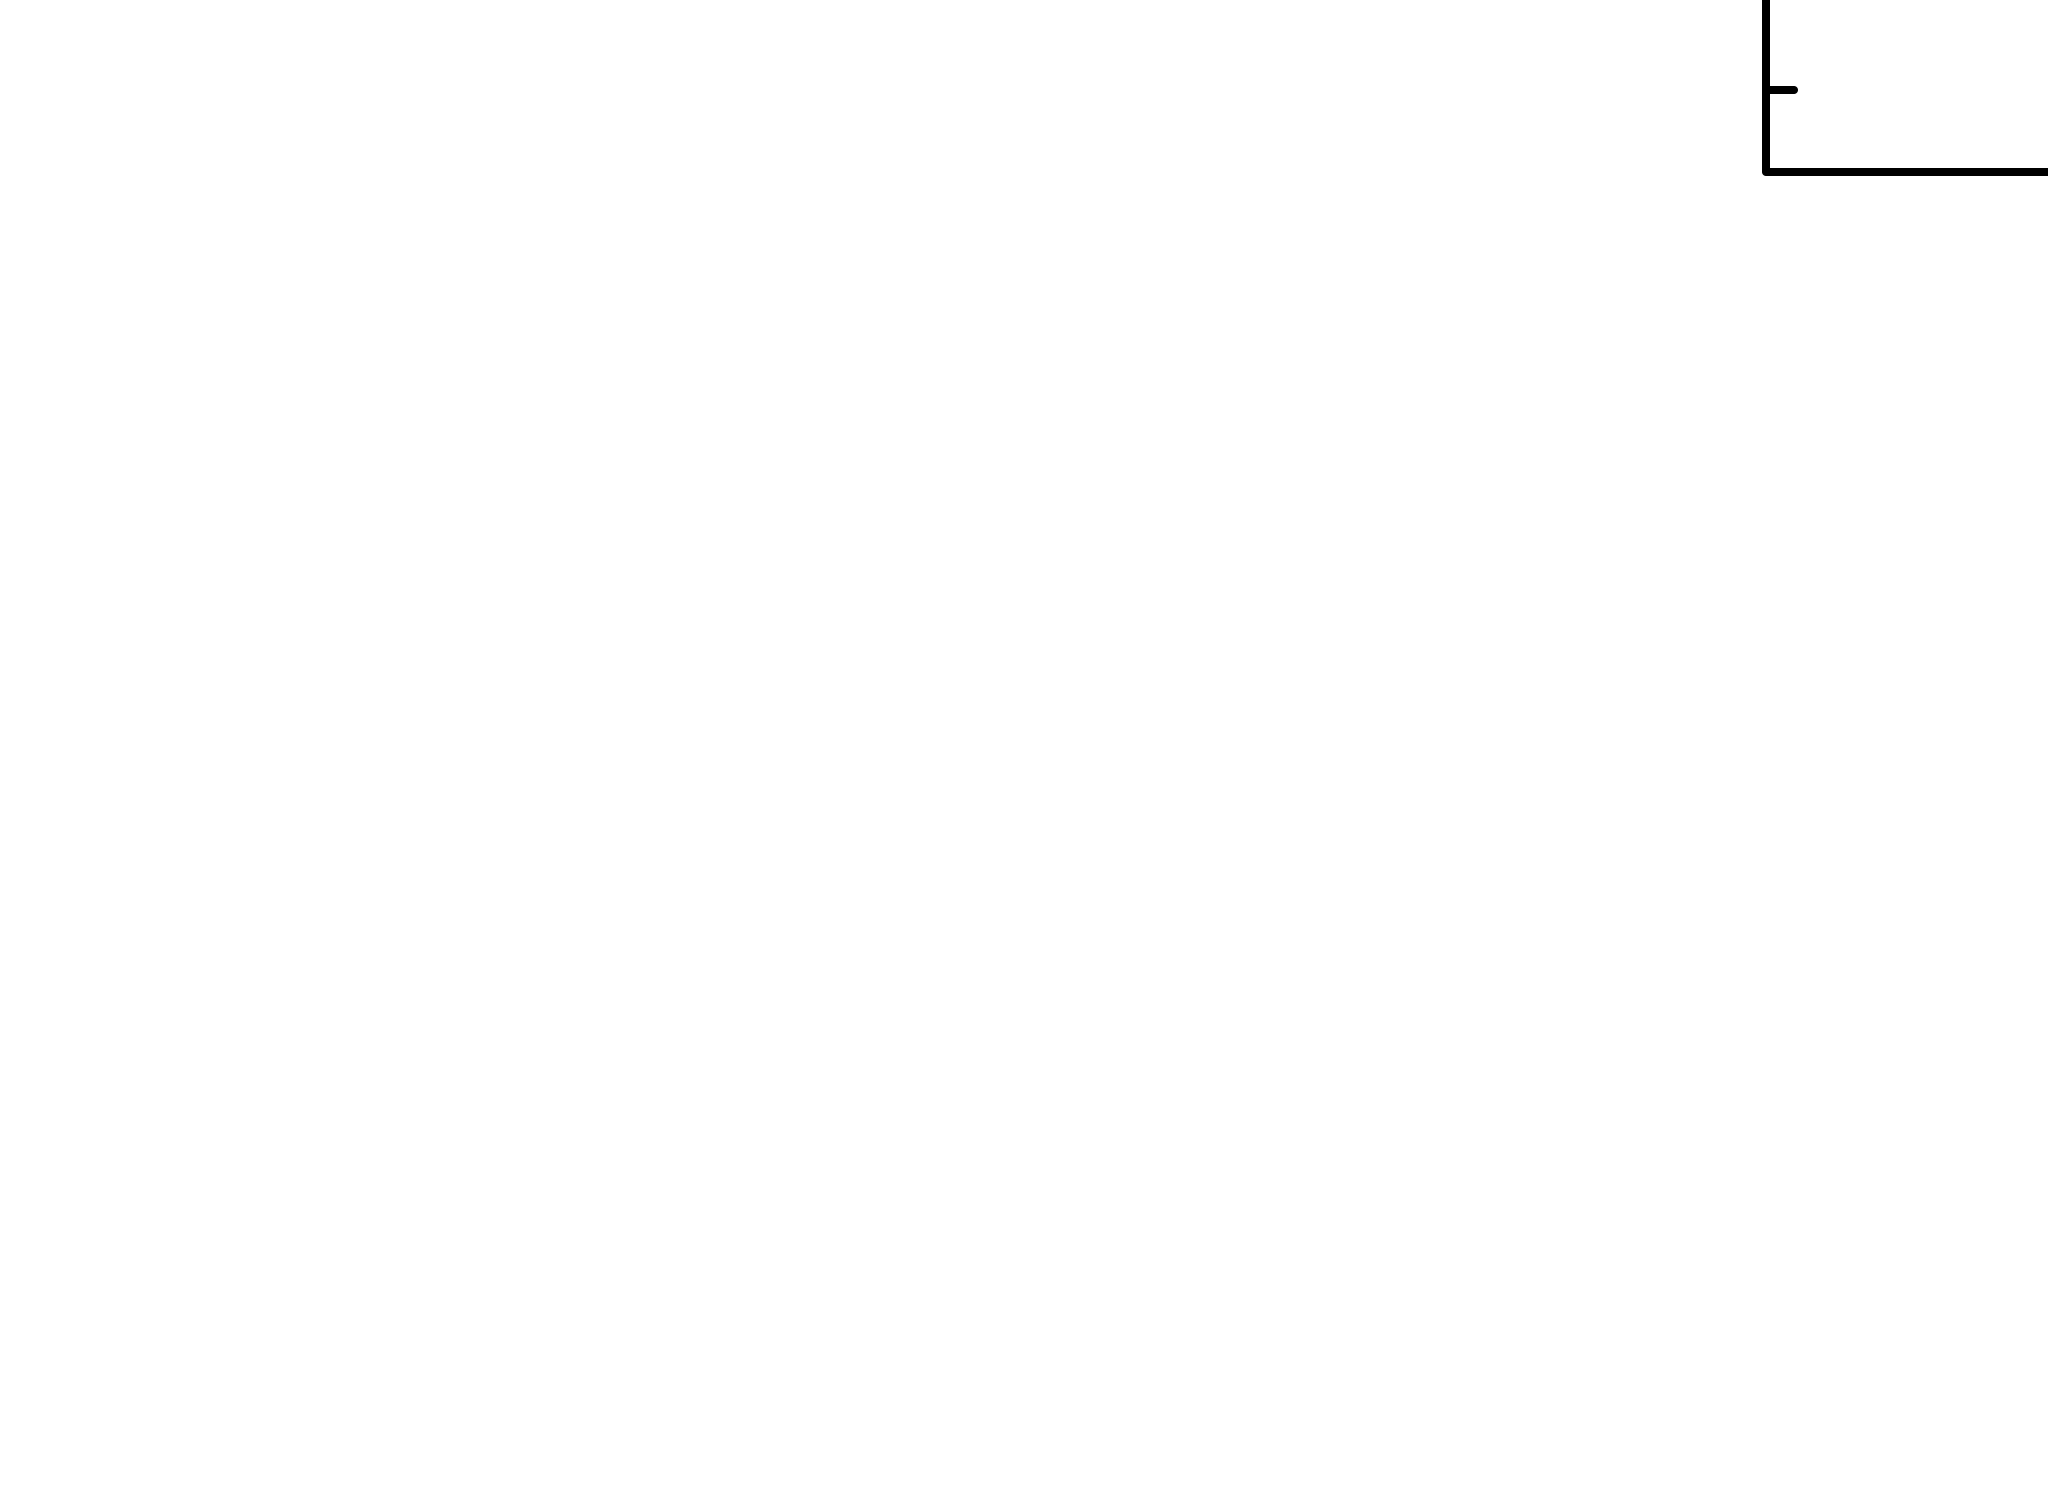


Fit statistic  : Chi-Squared              1.087781e+13     using 10 bins.

Test statistic : Chi-Squared              1.087781e+13     using 10 bins.
 Null hypothesis probability of 0.000000e+00 with 5 degrees of freedom
 Current data and model not fit yet.

Fit statistic  : Chi-Squared              9.333711e+12     using 10 bins.

Test statistic : Chi-Squared              9.333711e+12     using 10 bins.
 Null hypothesis probability of 0.000000e+00 with 5 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        3:norm    4:PhoIndex        5:norm
73.9378      14963.2       0       1.10475       1.05164   3.33402e-06       2.03253   2.54840e-06
66.5997      435091        0       1.19845       1.09856   3.36463e-06       1.23257   3.12121e-06
57.663       516032        0       1.29484       1.14257   3.39383e-06      0.849598   3.91960e-06
38.1094      470731        0       1.88839

In [15]:
AllModels.clear()
mo = Model("tbabs*(bbody+powerlaw)")
mo.bbody.kT = 1.0
mo.powerlaw.PhoIndex = 2.5
Fit.perform()
Plot("data resid")


Model TBabs<1>(bbody<2> + powerlaw<3> + gaussian<4>) Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bbody      kT         keV      3.00000      +/-  0.0          
   3    2   bbody      norm                1.00000      +/-  0.0          
   4    3   powerlaw   PhoIndex            1.00000      +/-  0.0          
   5    3   powerlaw   norm                1.00000      +/-  0.0          
   6    4   gaussian   LineE      keV      6.50000      +/-  0.0          
   7    4   gaussian   Sigma      keV      0.100000     +/-  0.0          
   8    4   gaussian   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              1.268253e+12     using 10 bins.

Test statistic : Chi-Squared              1.268253e+12     using 10 bins.
 Null hypothesis probability of 0.00

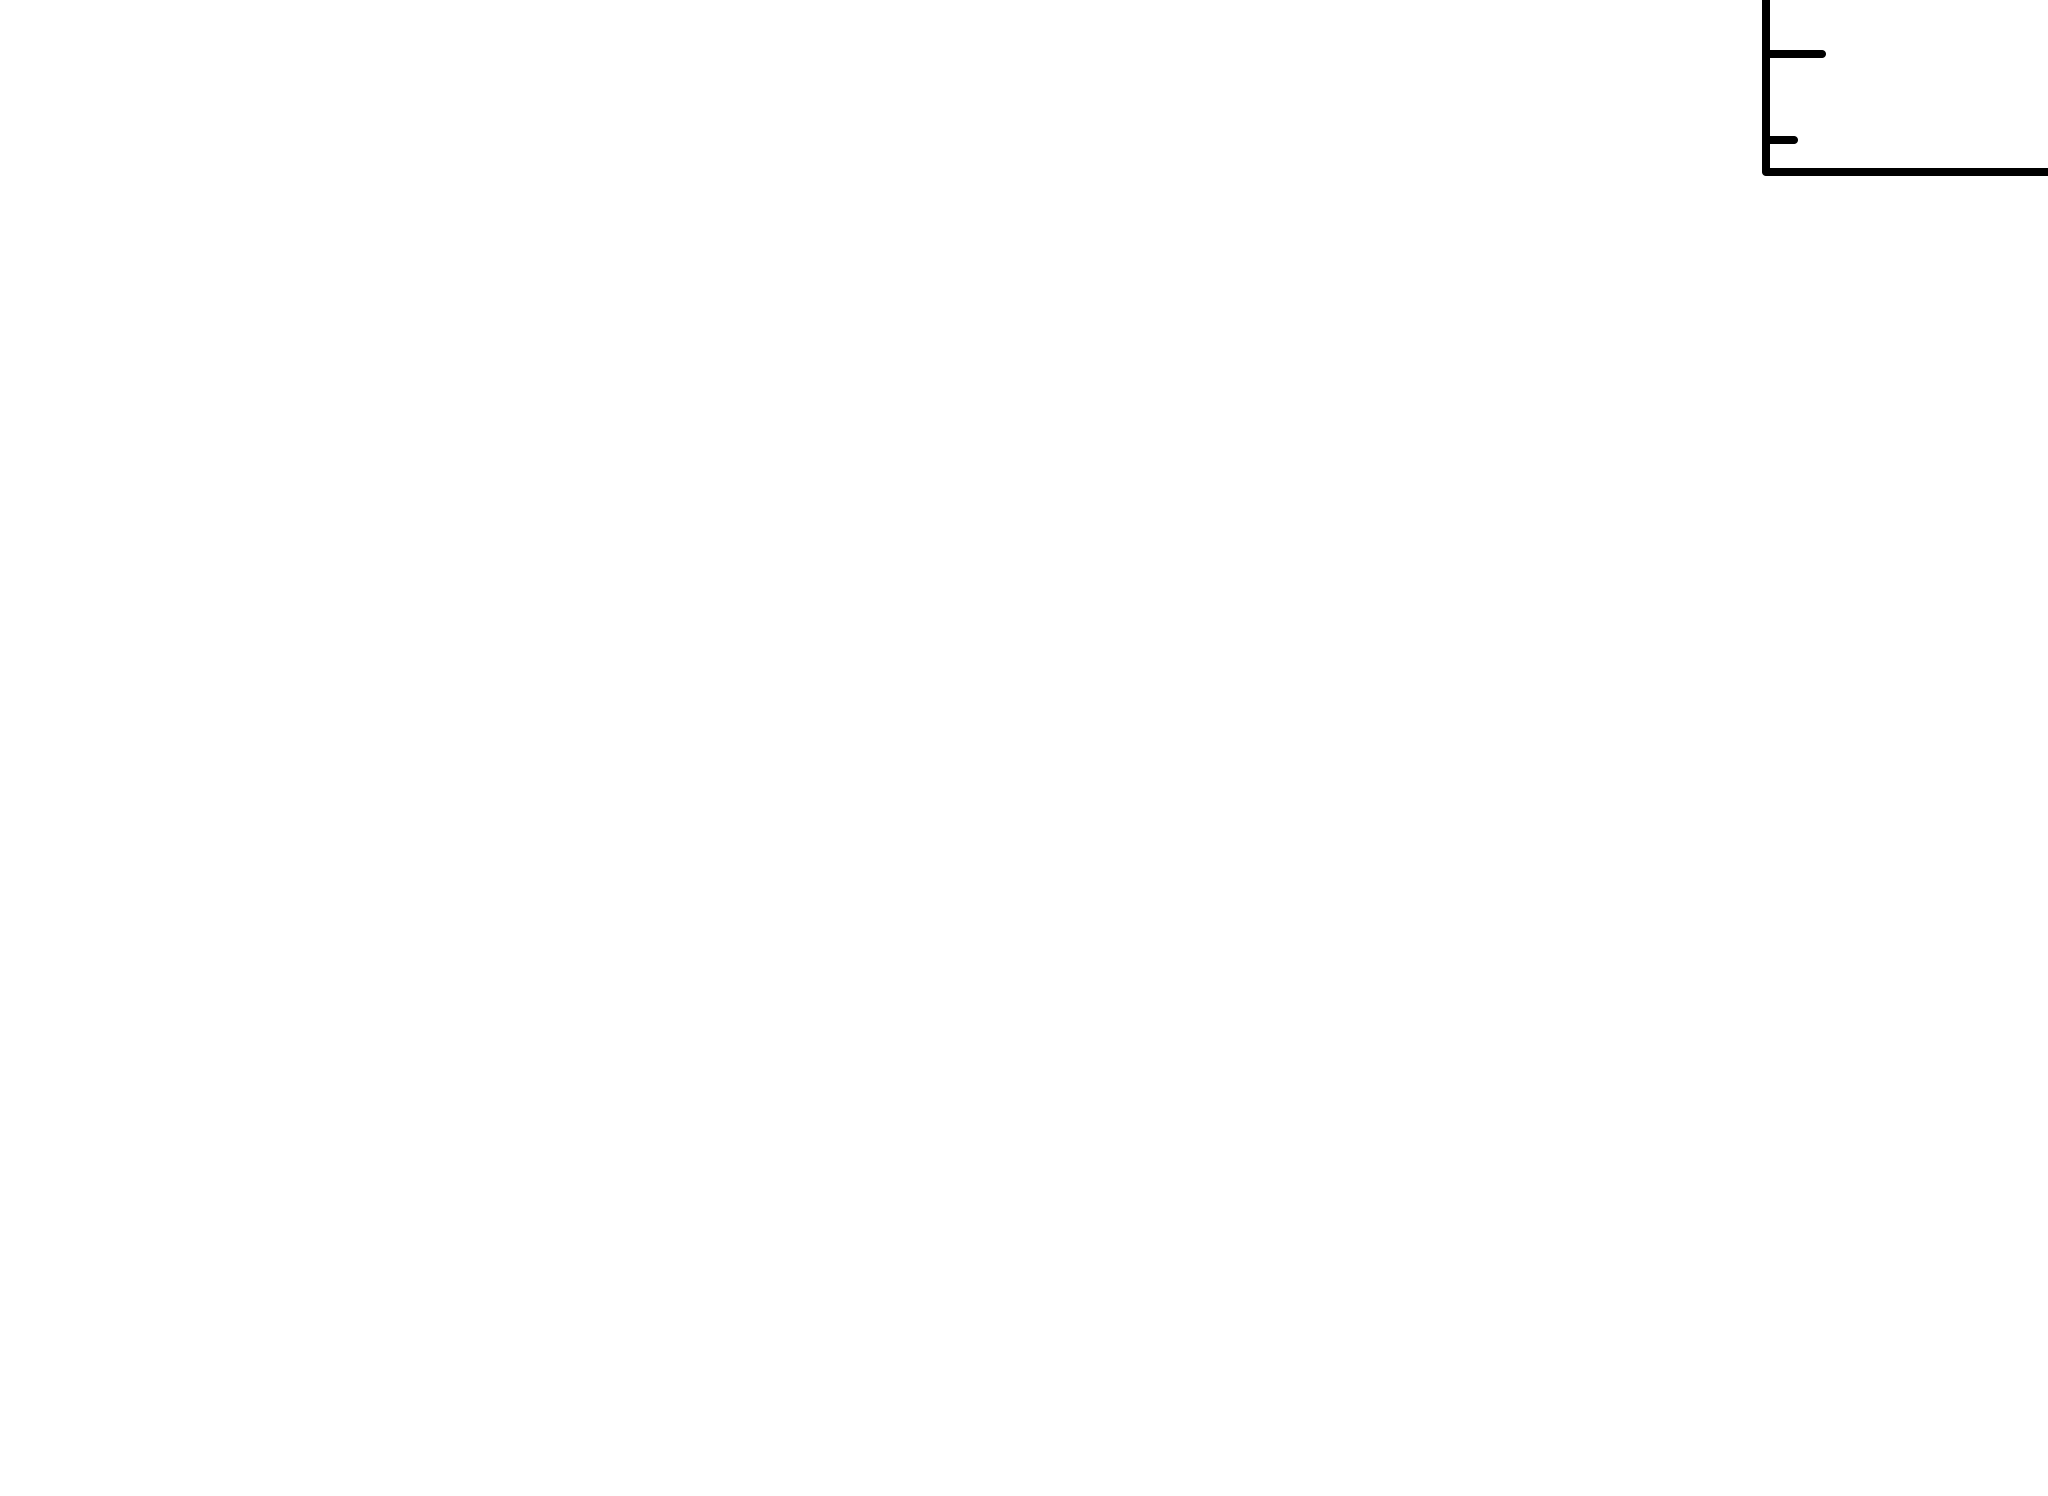

In [16]:
AllModels.clear()
mo = Model("tbabs*(bbody+powerlaw+gaussian)")
mo.bbody.kT = 1.0
mo.powerlaw.PhoIndex = 2.5
mo.gaussian.LineE = 6.7
mo.gaussian.LineE.frozen = True
Fit.perform()
Plot("data resid")